# How to measure whether an installation is oversized or not?

## 1. Exportation of all the data

In [21]:
#There are some non-float type in the file, especially in the last file (Winner)
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import time
import datetime
from datetime import datetime
import calendar
import os
from glob import glob
import ICLProjectFunctionsOVO2MD as f
import ICLProjectFunctionsOVO2MDBatch2 as f2
import ICLProjectFunctionsOVO2MDBatch3 as f3
import ICLProjectFunctions2 as f1

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3331: DtypeWarning: Columns (3,4,5,6,7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3331: DtypeWarning: Columns (0,1,3,4) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3331: DtypeWarning: Columns (3,4,6,7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3331: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/anaconda3/lib/python3.7/site-packages/IPython/core/interactives

In [42]:
#OVO2 BATCH1
PATH1 = '/Users/MatthiasDurand/Desktop/Imperial College/Master Thesis Project/Exported Data/OVO2 DATA'
RESULT_All1,RESULT_Concat1,NAMING1 = f.Exportation(PATH1)

In [73]:
#OVO2 BATCH2
PATH2 = '/Users/MatthiasDurand/Desktop/Imperial College/Master Thesis Project/Exported Data/OVO2 DATA BATCH 2'
RESULT_All2,RESULT_Concat2,NAMING2 = f3.Exportation(PATH2)

In [155]:
#OVO2 BATCH3
PATH3 = '/Users/MatthiasDurand/Desktop/Imperial College/Master Thesis Project/Exported Data/OVO2 DATA BATCH 3'
RESULT_All3,RESULT_Concat3,NAMING3 = f3.Exportation(PATH3)
#NAMING3 = NAMING3[1:len(NAMING3)] #For un unknown reason, a mistake value appeared in values NAMING3[0]

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3254: DtypeWarning: Columns (3,4,5,6,7) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [61]:
#for i in range (len(RESULT_Concat3)):
#    print(i,NAMING3[i],f.Number_of_Months(RESULT_Concat3[i]),'Months','(',f.Number_of_Hours(RESULT_Concat3[i]),'Hours)')

In [518]:
nameOVO2 = []
dfOVO2 = []

for i in range (len(RESULT_Concat1)):
    if i not in [1,14,16,19,38,28,41]:
        nameOVO2.append(NAMING1[i])
        dfOVO2.append(RESULT_Concat1[i])
for i in range (len(RESULT_Concat2)):
    if i not in [11,16,17]:
        nameOVO2.append(NAMING2[i])
        dfOVO2.append(RESULT_Concat2[i])
for i in range (len(RESULT_Concat3)):
    if i not in [20,21,23,29,31,41]:
        nameOVO2.append(NAMING3[i])
        dfOVO2.append(RESULT_Concat3[i])

School1_Clinic0 = np.ones([len(nameOVO2)])
for i in range (len(nameOVO2)):
    if 'DISPENSARY' in nameOVO2[i] or 'DISP' in nameOVO2[i]:
        School1_Clinic0[i] = 0
BatterySmall1_Big0 = np.zeros([len(dfOVO2)])
CountSchool = 0
for i in range (len(dfOVO2)):
    if f.Daily_Profile(dfOVO2[i])['Battery Voltage'].min()<37.0:
        BatterySmall1_Big0[i] = 1
        CountSchool+=1
CountSchool

115

In [44]:
#OVO1:
PATH01 = '/Users/MatthiasDurand/Desktop/Imperial College/Master Thesis Project/Exported Data/OVO1 PROJECT DATA V2'
RESULT_All01,RESULT_Concat01,NAMING01 = f1.Exportation(PATH01)
PATH02 = '/Users/MatthiasDurand/Desktop/Imperial College/Master Thesis Project/Exported Data/OVO1 PROJECT DATA/OVO1 PROJECT RMS DATA'
RESULT_All02,RESULT_Concat02,NAMING02 = f1.Exportation(PATH02)

In [45]:
#OVO1
for i in range (len(NAMING01)):
    for j in range (len(NAMING02)):
        if (NAMING01[i]==NAMING02[j]):
            df = pd.concat([RESULT_Concat01[i],RESULT_Concat02[j]])
            RESULT_Concat01[i] = df.resample('1H').mean()
nameOVO1 = []
dfOVO1 = []
for i in range (len(RESULT_Concat01)):
    if i not in [2,8,10]:
        nameOVO1.append(NAMING01[i])
        dfOVO1.append(RESULT_Concat01[i])

#### All the data have been exported and cleaned/processed

In [40]:
len(dfOVO2)

104

In [999]:
Prod = []
Cons = []

for i in range (len(dfOVO2)):
    Prod.append(f.Daily_Mean_Power(dfOVO2[i])[1])
    Cons.append(f.Daily_Mean_Power(dfOVO2[i])[0])
for i in range (len(dfOVO1)):
    Prod.append(f.Daily_Mean_Power(dfOVO1[i])[1])
    Cons.append(f.Daily_Mean_Power(dfOVO1[i])[0])



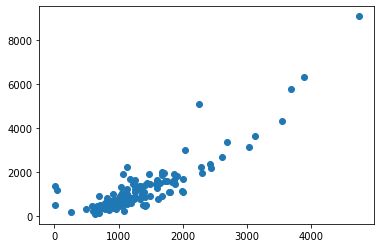

In [1000]:
plt.plot(Prod,Cons,'o')

# 1. What is containe in the datasets?

## 1.1. OVO1 dataset 

In [146]:
df=RESULT_Concat01
dm=NAMING01

In [142]:
L1 = []
L2 = []
namechart = dm
for i in range (len(df)):
    L1.append(f.Number_of_Months(df[i]))
    L2.append(f.Number_of_Hours(df[i]))
index=[]
for i in range (len(df)):
    index.append(i)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


([<matplotlib.axis.XTick at 0x1888a64a8>,
 <a list of 20 Text xticklabel objects>)

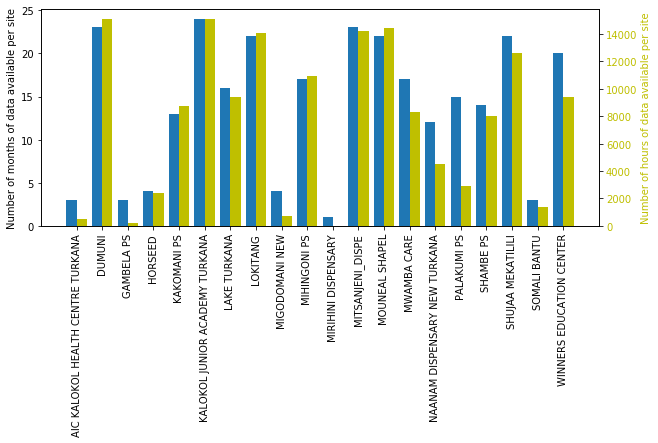

In [145]:
bar_width = 0.4
opacity = 0.8
index = np.array(index)
fig=plt.figure(figsize=(10, 4))
plt.xticks(rotation=90)
ax1 = fig.add_subplot(111)
ax1.bar(index,L1,bar_width)
ax1.set_ylabel('Number of months of data available per site')
ax2 = ax1.twinx()
ax2.bar(index+bar_width,L2,bar_width,color='y')
ax2.set_ylabel('Number of hours of data available per site', color='y')
for tl in ax2.get_yticklabels():
    tl.set_color('y')
plt.xticks(index + (1/2)*bar_width, namechart)

In [259]:
f.Percentage_Missing_Data(dfOVO1[12])

Supply Voltage         80.204124
Supply Current         80.204124
Battery Voltage        80.204124
Panel Voltage          80.204124
Panel Current          80.204124
Room Temperature       80.204124
Battery Temperature    80.204124
dtype: float64

## 1.2. OVO2 dataset


### 1.2.1. OVO2 Batch 1

In [133]:
df = RESULT_Concat1
dm = NAMING1

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


([<matplotlib.axis.XTick at 0x1427c4208>,
 <a list of 50 Text xticklabel objects>)

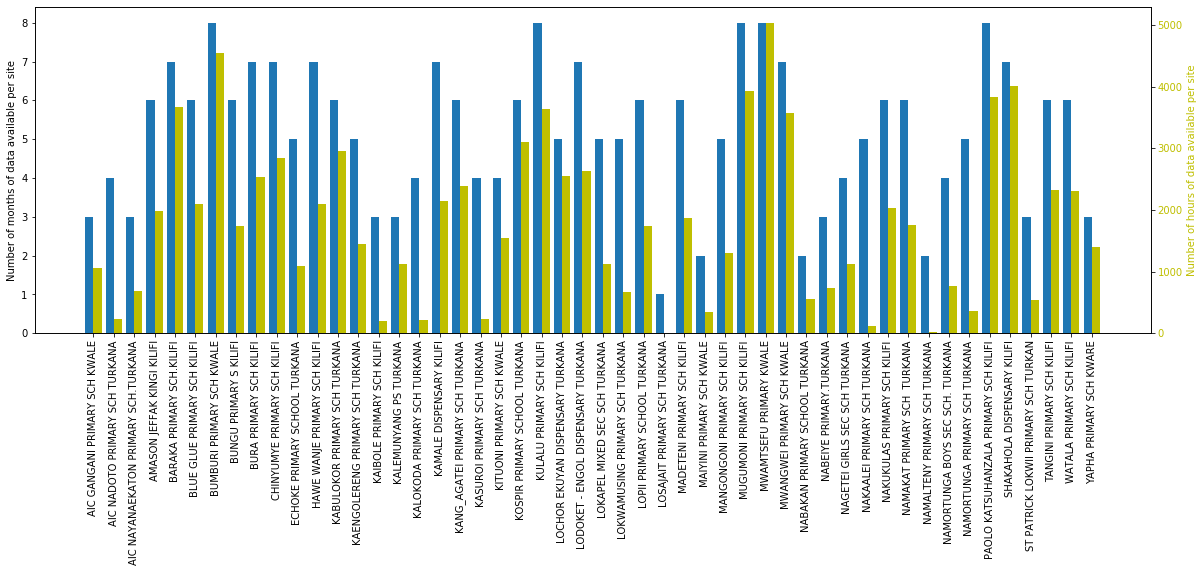

In [136]:
L1 = []
L2 = []
namechart = dm
for i in range (len(df)):
    L1.append(f.Number_of_Months(df[i]))
    L2.append(f.Number_of_Hours(df[i]))
index=[]
for i in range (len(df)):
    index.append(i)

bar_width = 0.4
opacity = 0.8
index = np.array(index)
fig=plt.figure(figsize=(20, 6))
plt.xticks(rotation=90)
ax1 = fig.add_subplot(111)
ax1.bar(index,L1,bar_width)
ax1.set_ylabel('Number of months of data available per site')
ax2 = ax1.twinx()
ax2.bar(index+bar_width,L2,bar_width,color='y')
ax2.set_ylabel('Number of hours of data available per site', color='y')
for tl in ax2.get_yticklabels():
    tl.set_color('y')
plt.xticks(index + (1/2)*bar_width, namechart)

### 1.2.2. OVO2 Batch 2

In [137]:
df = RESULT_Concat2
dm = NAMING2

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  app.launch_new_instance()


([<matplotlib.axis.XTick at 0x13d40a1d0>,
 <a list of 50 Text xticklabel objects>)

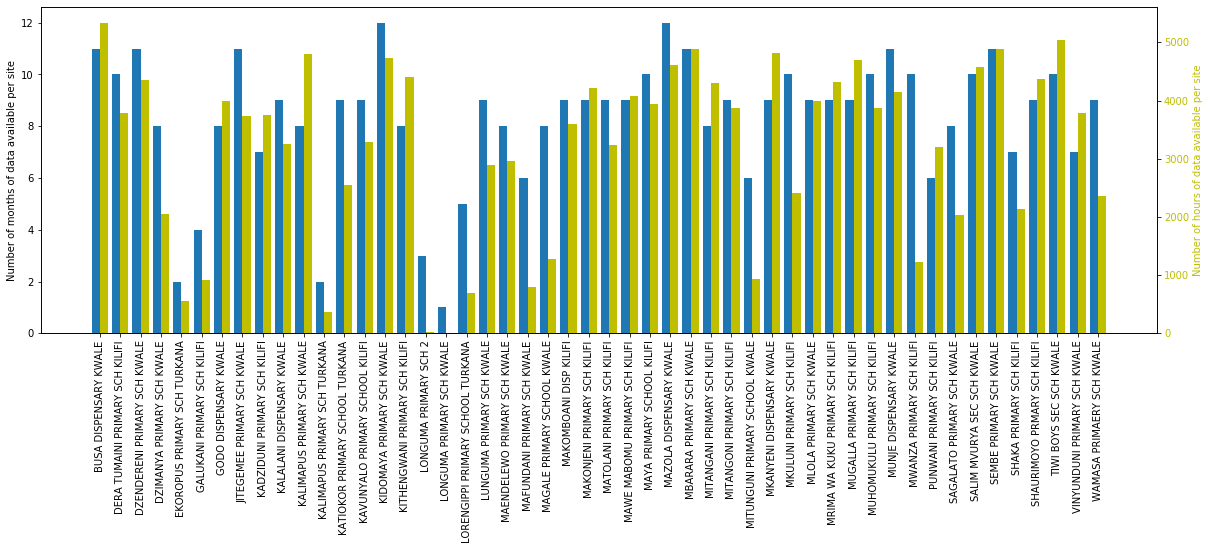

In [138]:
L1 = []
L2 = []
namechart = dm
for i in range (len(df)):
    L1.append(f.Number_of_Months(df[i]))
    L2.append(f.Number_of_Hours(df[i]))
index=[]
for i in range (len(df)):
    index.append(i)

bar_width = 0.4
opacity = 0.8
index = np.array(index)
fig=plt.figure(figsize=(20, 6))
plt.xticks(rotation=90)
ax1 = fig.add_subplot(111)
ax1.bar(index,L1,bar_width)
ax1.set_ylabel('Number of months of data available per site')
ax2 = ax1.twinx()
ax2.bar(index+bar_width,L2,bar_width,color='y')
ax2.set_ylabel('Number of hours of data available per site', color='y')
for tl in ax2.get_yticklabels():
    tl.set_color('y')
plt.xticks(index + (1/2)*bar_width, namechart)

### 1.2.3. OVO2 Batch 3

In [139]:
df = RESULT_Concat3
dm = NAMING3

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  app.launch_new_instance()


([<matplotlib.axis.XTick at 0x12d6c0940>,
 <a list of 49 Text xticklabel objects>)

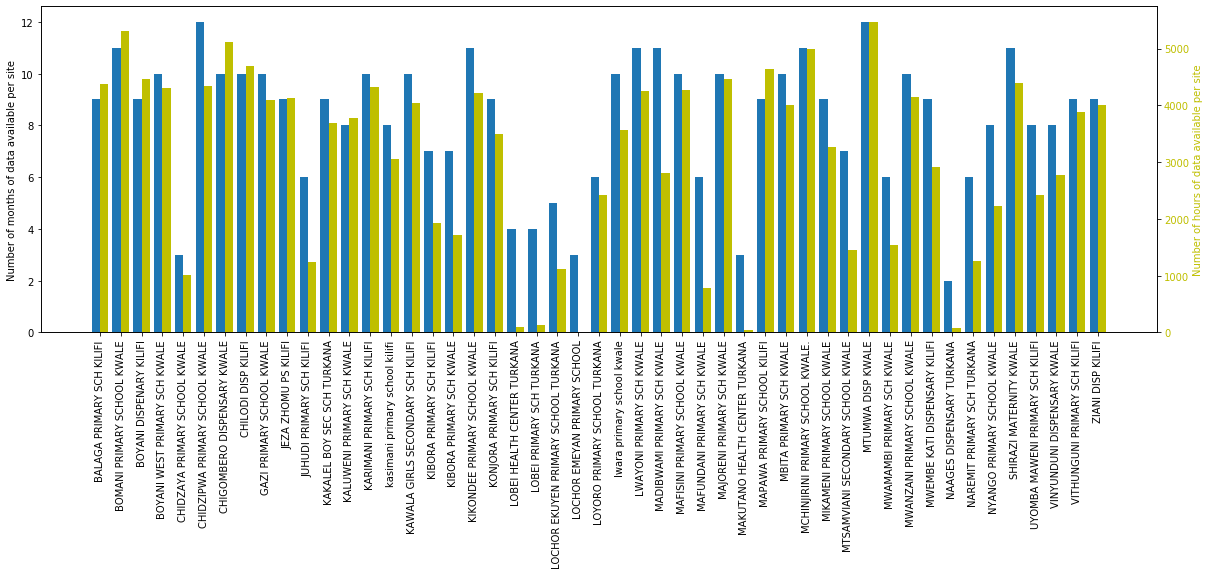

In [140]:
L1 = []
L2 = []
namechart = dm
for i in range (len(df)):
    L1.append(f.Number_of_Months(df[i]))
    L2.append(f.Number_of_Hours(df[i]))
index=[]
for i in range (len(df)):
    index.append(i)

bar_width = 0.4
opacity = 0.8
index = np.array(index)
fig=plt.figure(figsize=(20, 6))
plt.xticks(rotation=90)
ax1 = fig.add_subplot(111)
ax1.bar(index,L1,bar_width)
ax1.set_ylabel('Number of months of data available per site')
ax2 = ax1.twinx()
ax2.bar(index+bar_width,L2,bar_width,color='y')
ax2.set_ylabel('Number of hours of data available per site', color='y')
for tl in ax2.get_yticklabels():
    tl.set_color('y')
plt.xticks(index + (1/2)*bar_width, namechart)

In [233]:
L1,L2=[],[]
for i in range (len(dfOVO2)):
    L1.append(f.Number_of_Months(dfOVO2[i]))
    L2.append(f.Number_of_Hours(dfOVO2[i]))

In [234]:
#Distribution for the months
L1=np.array(L1)
M=L1.max()
MonthDistrib=np.zeros([M+1])
for i in range (M+1):
    for j in range (len(dfOVO2)):
        if L1[j]==i:
            MonthDistrib[i]+=1
NumberOfMonth=np.zeros([M+1])
for i in range (M+1):
    NumberOfMonth[i]=i
#plt.bar(L1,L2)

<BarContainer object of 13 artists>

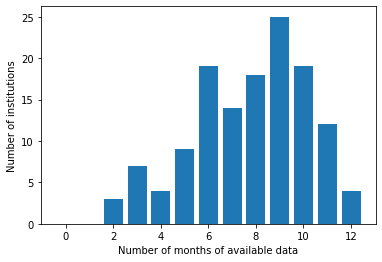

In [236]:
plt.xlabel("Number of months of available data")
plt.ylabel("Number of institutions")
plt.bar(NumberOfMonth,MonthDistrib)

In [239]:
#Distribution for the hours
L2=np.array(L2)
M=L2.max()
HourDistrib=np.zeros([M+1])
for i in range (56):
    for j in range (len(dfOVO2)):
        if L2[j]>i*100 and L2[j]<(i+1)*100:
            HourDistrib[i]+=1
NumberOfHour=np.zeros([M+1])
for i in range (56):
    NumberOfHour[i]=i*100

<BarContainer object of 5472 artists>

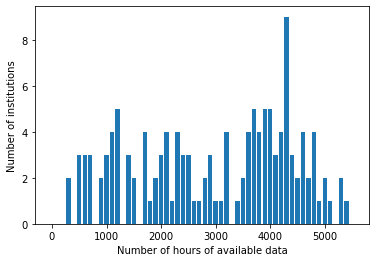

In [240]:
plt.xlabel("Number of hours of available data")
plt.ylabel("Number of institutions")
bar_width = 80
plt.bar(NumberOfHour,HourDistrib,bar_width)

In [244]:
L2.mean()

3008.1641791044776

##### Percentage of missing values for OVO1&2 

In [279]:
L1=[]
for i in range (len(dfOVO2)):
    L1.append(f.Percentage_Missing_Data(dfOVO2[i])['Supply Voltage'])
L2=[]
for i in range (len(dfOVO1)):
    L2.append(f.Percentage_Missing_Data(dfOVO1[i])['Supply Voltage'])

In [285]:
#Distribution for the percentage of missing values
L1=np.array(L1)
L2=np.array(L2)
M=L1.max()
Miss=np.zeros([21])
for i in range (21):
    for j in range (len(dfOVO2)):
        if L1[j]>i*5 and L1[j]<(i+1)*5:
            Miss[i]+=1
for i in range (21):
    for j in range (len(dfOVO1)):
        if L2[j]>i*5 and L2[j]<(i+1)*5:
            Miss[i]+=1
Perc=np.zeros([21])
for i in range (21):
    Perc[i]=i*5
M

92.52145484266448

<BarContainer object of 21 artists>

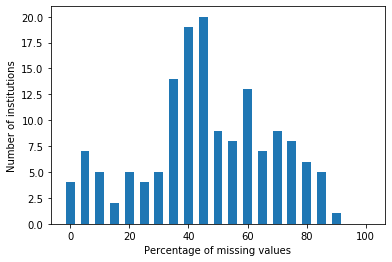

In [774]:
plt.xlabel("Percentage of missing values")
plt.ylabel("Number of institutions")
bar_width = 3
plt.bar(Perc,Miss,bar_width)

# 2. Time evolution of the variables

## 2.1. On a few days scale

'AIC KALOKOL HEALTH CENTRE TURKANA'

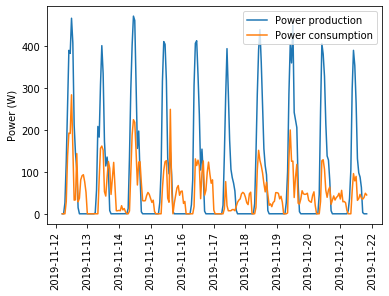

In [401]:
plt.ylabel("Power (W)")
plt.plot((dfOVO1[0]['Panel Voltage']*dfOVO1[0]['Panel Current'])[1123:1355])
plt.plot((dfOVO1[0]['Supply Voltage']*dfOVO1[0]['Supply Current'])[1123:1355])
plt.xticks(rotation=90)
plt.legend(['Power production','Power consumption'])
nameOVO1[0]

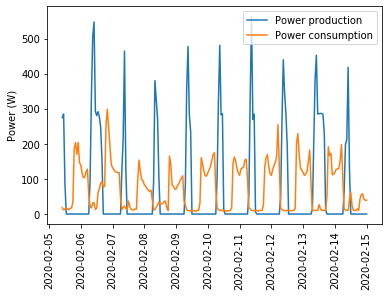

In [429]:
df=dfOVO2[5]
plt.ylabel("Power (W)")
plt.plot((df['Panel Voltage']*df['Panel Current'])[1000:1400])
plt.plot((df['Supply Voltage']*df['Supply Current'])[1000:1400])
plt.xticks(rotation=90)
plt.legend(['Power production','Power consumption'])

## 2.2. On all the time period available

(0, 5700)

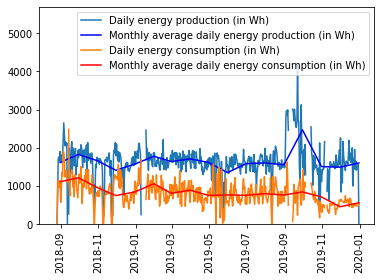

In [948]:
df=dfOVO1[7]
plt.plot(f.Daily_Mean(df['Panel Voltage']*df['Panel Current'])*24)
plt.plot(f.Monthly_Mean(df['Panel Voltage']*df['Panel Current'])*24,'b')
plt.plot(f.Daily_Mean(df['Supply Voltage']*df['Supply Current'])*24)
plt.plot(f.Monthly_Mean(df['Supply Voltage']*df['Supply Current'])*24,'r')
plt.xticks(rotation=90)
plt.legend(['Daily energy production (in Wh)','Monthly average daily energy production (in Wh)',
            'Daily energy consumption (in Wh)','Monthly average daily energy consumption (in Wh)'])
nameOVO1[7]
axes = plt.gca()
axes.set_ylim(0, 5700)

'MOUNEAL SHAPEL'

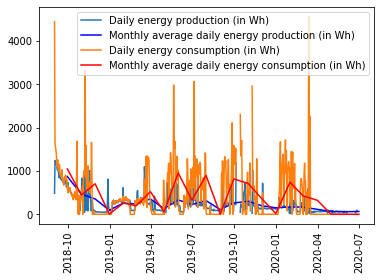

In [530]:
df=dfOVO1[9]
plt.plot(f.Daily_Mean(df['Panel Voltage']*df['Panel Current'])*24)
plt.plot(f.Monthly_Mean(df['Panel Voltage']*df['Panel Current'])*24,'b')
plt.plot(f.Daily_Mean(df['Supply Voltage']*df['Supply Current'])*24)
plt.plot(f.Monthly_Mean(df['Supply Voltage']*df['Supply Current'])*24,'r')
plt.xticks(rotation=90)
plt.legend(['Daily energy production (in Wh)','Monthly average daily energy production (in Wh)',
            'Daily energy consumption (in Wh)','Monthly average daily energy consumption (in Wh)'])
nameOVO1[9]

'SHAURIMOYO PRMARY SCH KILIFI'

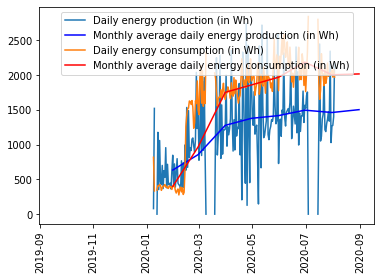

In [564]:
df=dfOVO2[86]
plt.plot(f.Daily_Mean(df['Panel Voltage']*df['Panel Current'])*24)
plt.plot(f.Monthly_Mean(df['Panel Voltage']*df['Panel Current'])*24,'b')
plt.plot(f.Daily_Mean(df['Supply Voltage']*df['Supply Current'])*24)
plt.plot(f.Monthly_Mean(df['Supply Voltage']*df['Supply Current'])*24,'r')
plt.xticks(rotation=90)
plt.legend(['Daily energy production (in Wh)','Monthly average daily energy production (in Wh)',
            'Daily energy consumption (in Wh)','Monthly average daily energy consumption (in Wh)'])
nameOVO2[86]

# 3. Daily Profile

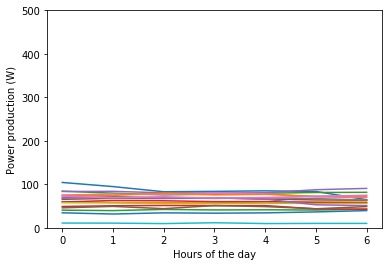

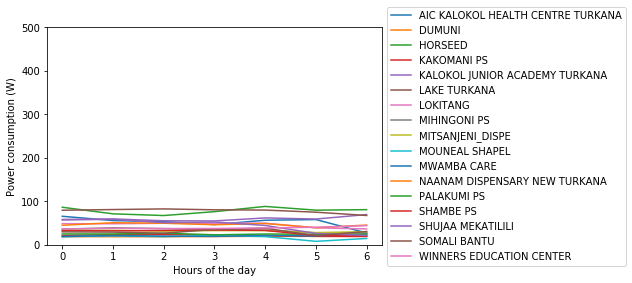

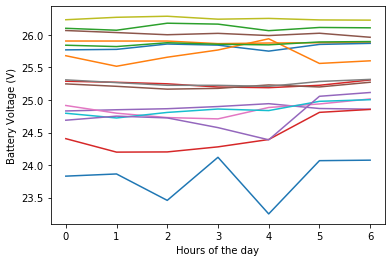

In [977]:
plt.figure()
plt.xlabel("Hours of the day")
plt.ylabel("Power production (W)")
for i in range (len(dfOVO1)):
    plt.plot(f.Weekly_Profile(dfOVO1[i]['Panel Voltage']*dfOVO1[i]['Panel Current']))
axes = plt.gca()
axes.set_ylim(0, 500)
plt.figure()
plt.xlabel("Hours of the day")
plt.ylabel("Power consumption (W)")
for i in range (len(dfOVO1)):
    plt.plot(f.Weekly_Profile(dfOVO1[i]['Supply Voltage']*dfOVO1[i]['Supply Current']))
axes = plt.gca()
axes.set_ylim(0, 500)

plt.legend(nameOVO1,loc='center left', bbox_to_anchor=(1, 0.5))

plt.figure()
plt.xlabel("Hours of the day")
plt.ylabel("Battery Voltage (V)")
for i in range (len(dfOVO1)):
    if f.Daily_Profile(dfOVO1[i]['Battery Voltage']).max()>20:
        plt.plot(f.Weekly_Profile(dfOVO1[i]['Battery Voltage']))

In [986]:
legend=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
len(legend)
len(f.Weekly_Profile(df['Supply Current']*df['Supply Voltage']))

7

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`)

(0, 500)

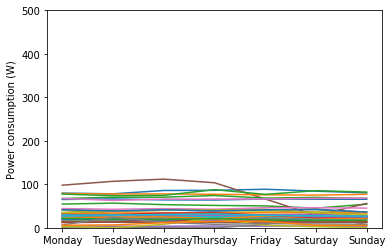

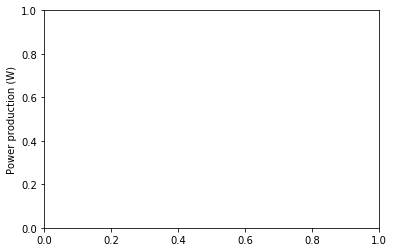

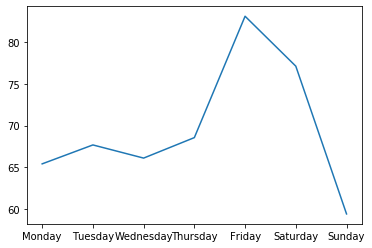

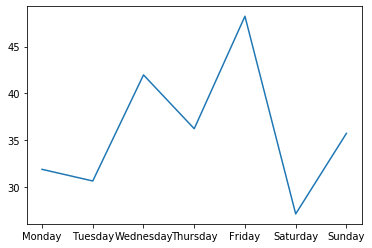

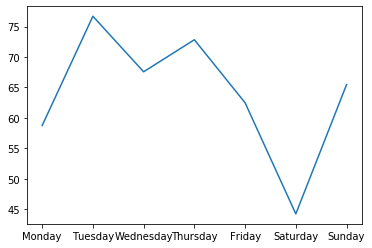

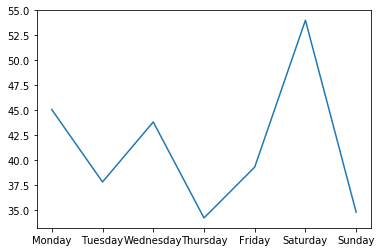

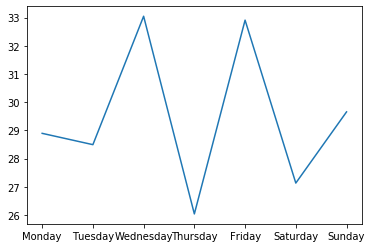

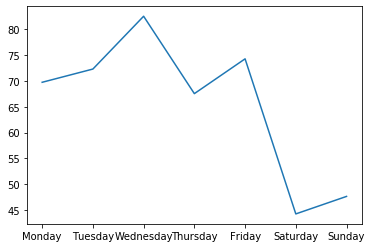

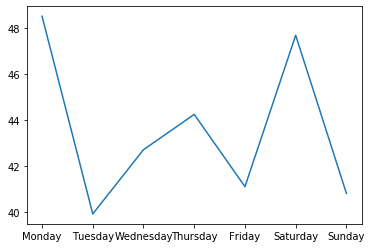

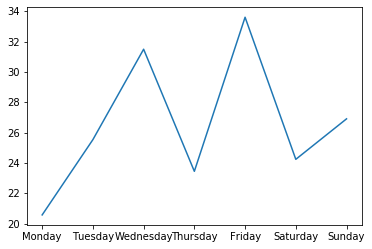

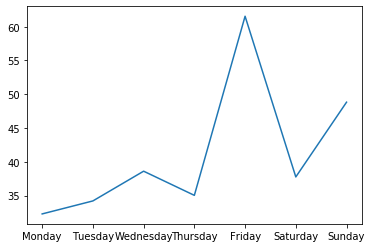

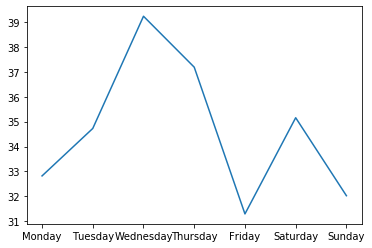

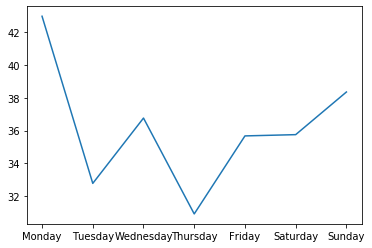

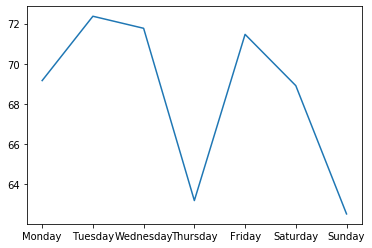

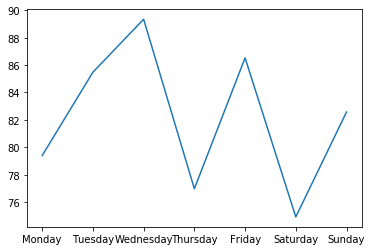

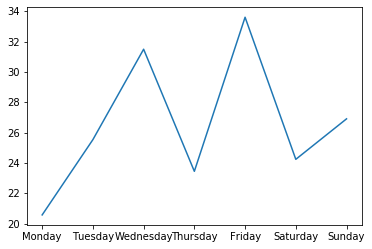

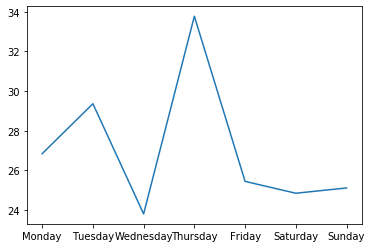

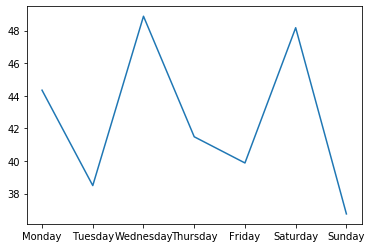

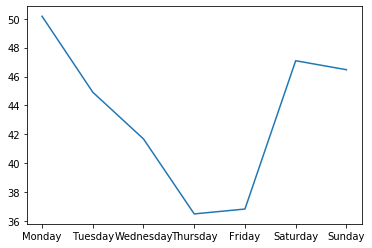

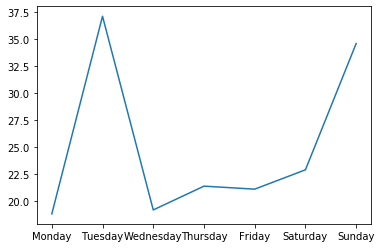

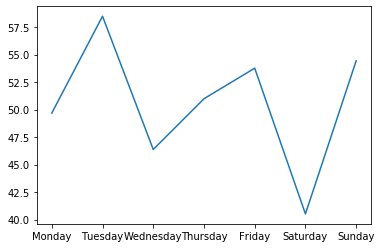

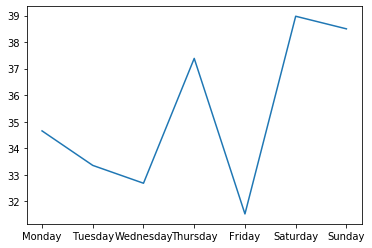

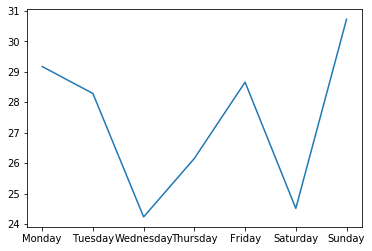

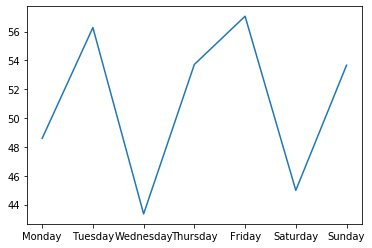

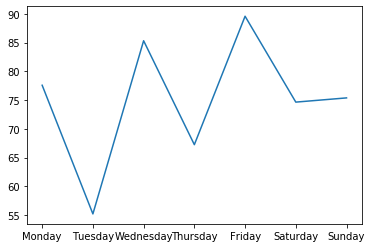

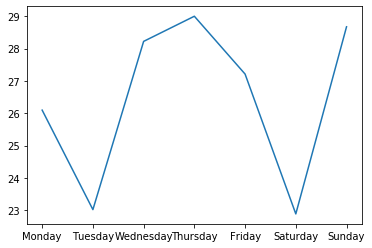

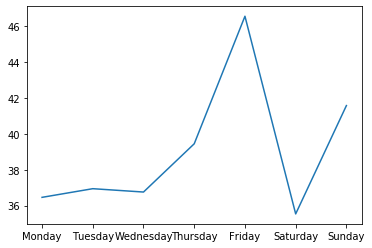

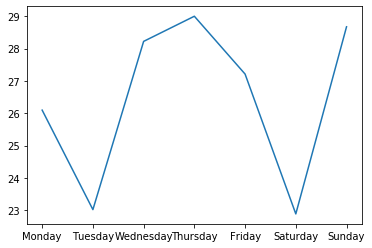

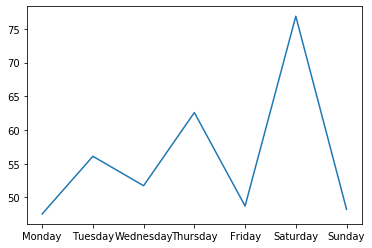

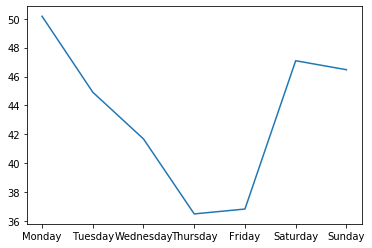

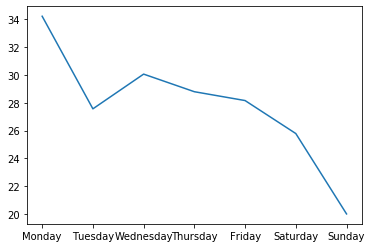

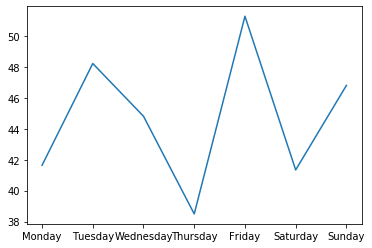

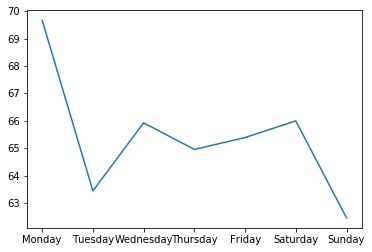

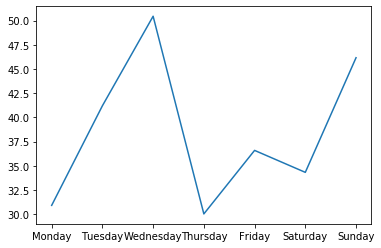

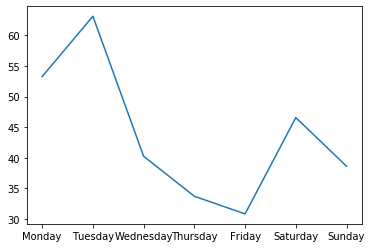

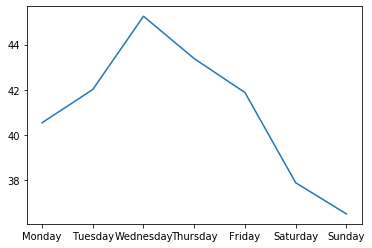

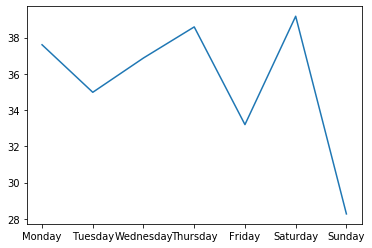

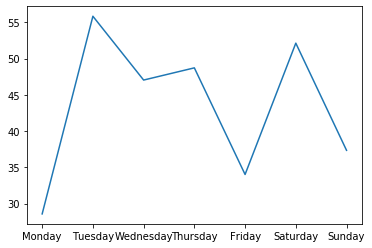

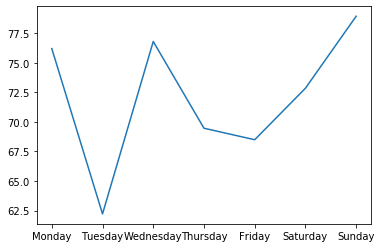

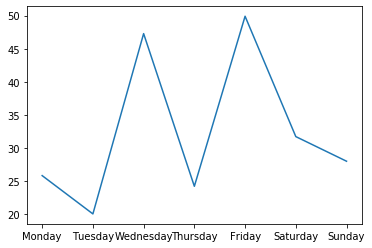

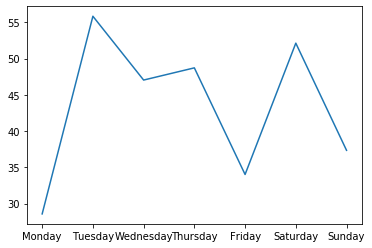

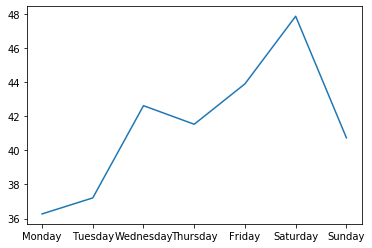

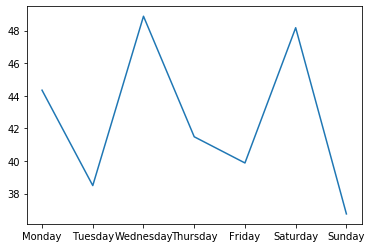

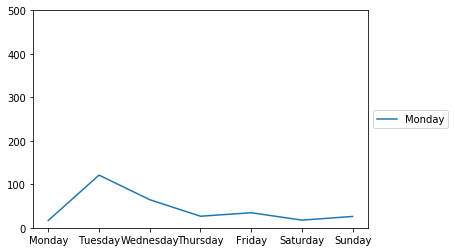

In [989]:
Day=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
#L = np.random.randint(0,134,50)
#plt.xlabel("Hours of the day")
plt.ylabel("Power consumption (W)")
for i in L:
    if BatterySmall1_Big0[i]==1:
        df=dfOVO2[i]
        plt.plot(Day, f.Weekly_Profile(df['Supply Current']*df['Supply Voltage']))
axes = plt.gca()
axes.set_ylim(0, 500)
plt.figure()
#plt.xlabel("Hours of the day")
plt.ylabel("Power production (W)")

for i in L:
    if BatterySmall1_Big0[i]==1:
        plt.figure()
        df=dfOVO2[i]
        plt.plot(Day,f.Weekly_Profile(df['Panel Current']*df['Panel Voltage']))
        legend.append(nameOVO2[i])
plt.legend(legend,loc='center left', bbox_to_anchor=(1, 0.5))
axes = plt.gca()
axes.set_ylim(0, 500)

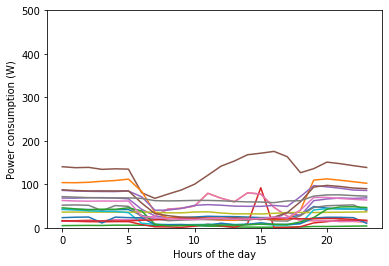

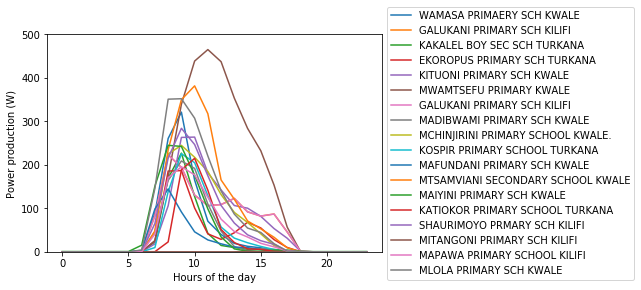

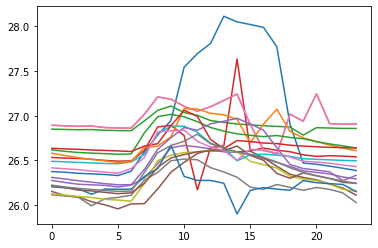

In [736]:
#N = np.random.randint(0,134,20)
plt.xlabel("Hours of the day")
plt.ylabel("Power consumption (W)")
for i in M:
    if BatterySmall1_Big0[i]==1:
        df=dfOVO2[i]
        plt.plot(f.Daily_Profile(df['Supply Current']*df['Supply Voltage']))
axes = plt.gca()
axes.set_ylim(0, 500)
plt.figure()
plt.xlabel("Hours of the day")
plt.ylabel("Power production (W)")
legend=[]
for i in M:
    if BatterySmall1_Big0[i]==1:
        df=dfOVO2[i]
        plt.plot(f.Daily_Profile(df['Panel Current']*df['Panel Voltage']))
        legend.append(nameOVO2[i])
plt.legend(legend,loc='center left', bbox_to_anchor=(1, 0.5))
axes = plt.gca()
axes.set_ylim(0, 500)
plt.figure()
for i in M:
    if BatterySmall1_Big0[i]==1:
        df=dfOVO2[i]
        plt.plot(f.Daily_Profile(df['Battery Voltage']))

# 4. Power production, power consumption, Utilization rate

In [800]:
ProdSc = []
ConsSc = []
ScList=[]
for i in range (len(dfOVO2)):
    if BatterySmall1_Big0[i]==1:
        ProdSc.append(f.Daily_Mean_Power(dfOVO2[i])[1])
        ConsSc.append(f.Daily_Mean_Power(dfOVO2[i])[0])
        ScList.append(i)
ProdCl = []
ConsCl = []
name=[]
for i in range (len(dfOVO2)):
    if BatterySmall1_Big0[i]==0:
        ProdCl.append(f.Daily_Mean_Power(dfOVO2[i])[1])
        ConsCl.append(f.Daily_Mean_Power(dfOVO2[i])[0])
        name.append(nameOVO2[i])
Prod1 = []
Cons1 = []

for i in range (len(dfOVO1)):
    Prod1.append(f.Daily_Mean_Power(dfOVO1[i])[1])
    Cons1.append(f.Daily_Mean_Power(dfOVO1[i])[0])

Text(0, 0.5, 'Energy (Wh)')

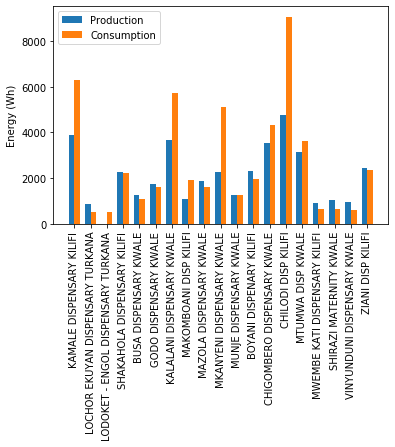

In [801]:
Prod = ProdCl
Cons = ConsCl
namechart = name
index=np.zeros(len(Prod))
for i in range (len(Prod)):
    index[i]=i
bar_width = 0.35
plt.bar(index,Prod,bar_width)
plt.bar(index+bar_width,Cons,bar_width)
plt.xticks(rotation=90)
plt.legend(['Production','Consumption'])
#Daily mean prod and cons in Wh/day
plt.xticks(index + (1/2)*bar_width, namechart)
plt.ylabel("Energy (Wh)")

Text(0, 0.5, 'Utilization Rate (%)')

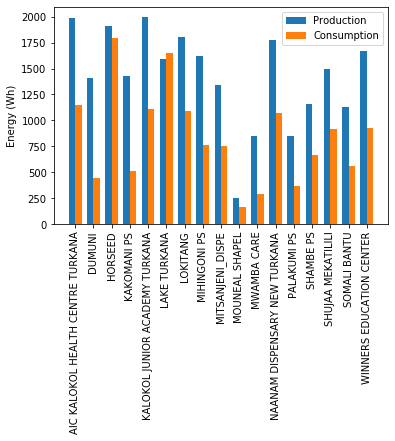

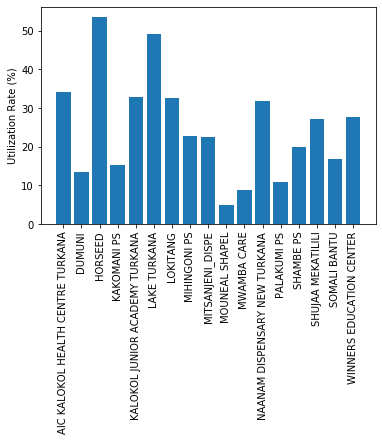

In [969]:
Prod = Prod1
Cons = Cons1
namechart = nameOVO1
index=np.zeros(len(Prod))
for i in range (len(Prod)):
    index[i]=i
bar_width = 0.35
plt.bar(index,Prod,bar_width)
plt.bar(index+bar_width,Cons,bar_width)
plt.xticks(rotation=90)
plt.legend(['Production','Consumption'])
#Daily mean prod and cons in Wh/day
plt.xticks(index + (1/2)*bar_width, namechart)
plt.ylabel("Energy (Wh)")
plt.figure()
Cons1 = np.array(Cons1)
plt.bar(nameOVO1,100*Cons1/3360)
plt.xticks(rotation=90)
plt.ylabel("Utilization Rate (%)")

Text(0, 0.5, 'Power (W)')

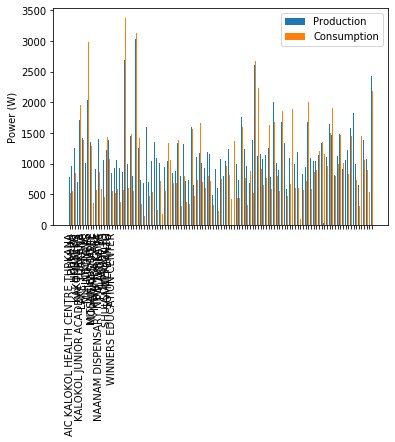

In [766]:
Prod = ProdSc
Cons = ConsSc
namechart = nameOVO1
index=np.zeros(len(Prod))
for i in range (len(Prod)):
    index[i]=i
bar_width = 0.35
plt.bar(index,Prod,bar_width)
plt.bar(index+bar_width,Cons,bar_width)
plt.xticks(rotation=90)
plt.legend(['Production','Consumption'])
#Daily mean prod and cons in Wh/day
plt.xticks(index + (1/2)*bar_width, namechart)
plt.ylabel("Power (W)")

In [767]:
L2=np.array(ConsSc)
M=L2.max()
M

3378.2688766876436

In [960]:
#Distribution of the power consumed and produced for the schools
L2=np.array(ConsSc)
M=L2.max()
ConsDistrib=np.zeros(35)
for i in range (35):
    for j in range (len(L2)):
        if L2[j]>i*100 and L2[j]<(i+1)*100:
            ConsDistrib[i]+=1
NumberOfSchool=np.zeros(35)
for i in range (35):
    NumberOfSchool[i]=i*100

<BarContainer object of 35 artists>

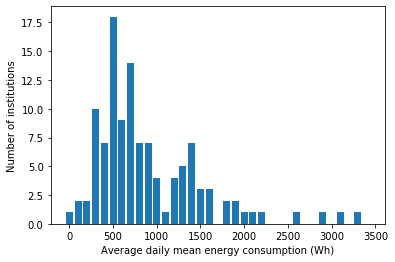

In [961]:
plt.xlabel("Average daily mean energy consumption (Wh)")
plt.ylabel("Number of institutions")
bar_width = 80
plt.bar(NumberOfSchool,ConsDistrib,bar_width)

<BarContainer object of 35 artists>

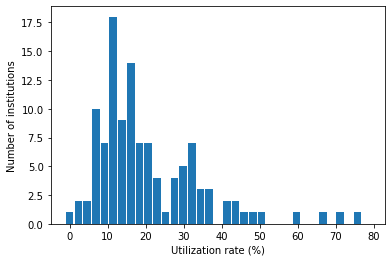

In [965]:
NumberOfSchool1 = 100*NumberOfSchool/4360
plt.xlabel("Utilization rate (%)")
plt.ylabel("Number of institutions")
bar_width = 2
plt.bar(NumberOfSchool1,ConsDistrib,bar_width)

In [780]:
#Distribution of the power produced for the schools
L2=np.array(ProdSc)
M=L2.max()
ProdDistrib=np.zeros(35)
for i in range (35):
    for j in range (len(L2)):
        if L2[j]>i*100 and L2[j]<(i+1)*100:
            ProdDistrib[i]+=1
NumberOfSchool=np.zeros(35)
for i in range (35):
    NumberOfSchool[i]=i*100

<BarContainer object of 35 artists>

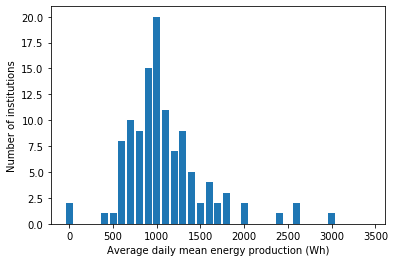

In [792]:
plt.xlabel("Average daily mean energy production (Wh)")
plt.ylabel("Number of institutions")
bar_width = 80
plt.bar(NumberOfSchool,ProdDistrib,bar_width)

In [798]:
ConsSc = np.array(ConsSc)
ConsCl = np.array(ConsCl)
Cons1 = np.array(Cons1)
Cons1.mean()

837.1011528462587

# 5. Correlation between energy consumption and energy production

In [577]:
ProdSc = []
ConsSc = []

for i in range (len(dfOVO2)):
    if BatterySmall1_Big0[i]==1:
        ProdSc.append(f.Daily_Mean_Power(dfOVO2[i])[1])
        ConsSc.append(f.Daily_Mean_Power(dfOVO2[i])[0])

ProdCl = []
ConsCl = []

for i in range (len(dfOVO2)):
    if BatterySmall1_Big0[i]==0:
        ProdCl.append(f.Daily_Mean_Power(dfOVO2[i])[1])
        ConsCl.append(f.Daily_Mean_Power(dfOVO2[i])[0])
        
Prod1 = []
Cons1 = []

for i in range (len(dfOVO1)):
    Prod1.append(f.Daily_Mean_Power(dfOVO1[i])[1])
    Cons1.append(f.Daily_Mean_Power(dfOVO1[i])[0])

Production = 1.4787986499286276 * Consumption -745.4377845299919
0.8758223409179553


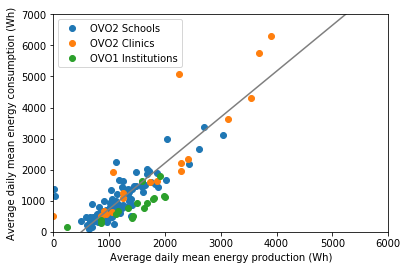

In [1001]:
plt.plot(ProdSc,ConsSc,'o')
plt.plot(ProdCl,ConsCl,'o')

plt.plot(Prod1,Cons1,'o')
plt.xlabel("Average daily mean energy production (Wh)")
plt.ylabel("Average daily mean energy consumption (Wh)")
from scipy import stats
slopeSc, interceptSc, r_valueSc, p_value, std_err = stats.linregress(ProdSc, ConsSc)
slopeCl, interceptCl, r_valueCl, p_value, std_err = stats.linregress(ProdCl, ConsCl)
slope1, intercept1, r_value1, p_value, std_err = stats.linregress(Prod1, Cons1)
slope, intercept, r_value, p_value, std_err = stats.linregress(Prod, Cons)
#plt.plot([1,6000],np.dot(slopeSc,[1,6000]) + interceptSc,'b')
#plt.plot([1,6000],np.dot(slopeCl,[1,6000]) + interceptCl,'tab:brown')
#plt.plot([1,6000],np.dot(slope1,[1,6000]) + intercept1,'r')
plt.plot([1,6000],np.dot(slope,[1,6000]) + intercept,'tab:gray')
#plt.plot([1,6000],np.dot(slopeCl,[1,6000]) + interceptCl)
#plt.plot([1,6000],np.dot(slope1,[1,6000]) + intercept1,'g')
print('Production =',slope,'* Consumption',intercept )
print(r_value)
axes = plt.gca()
axes.set_ylim(0, 7000)
axes.set_xlim(0, 6000)
plt.legend(['OVO2 Schools','OVO2 Clinics','OVO1 Institutions'])

0.07520612441469603

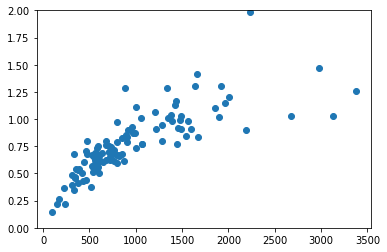

In [976]:
ProdSc,ConsSc = np.array(ProdSc) , np.array(ConsSc)
plt.plot(ConsSc,ConsSc/ProdSc,'o')
axes = plt.gca()
axes.set_ylim(0, 2)
slope, intercept, r_value, p_value, std_err = stats.linregress(ConsSc,ConsSc/ProdSc)
r_value

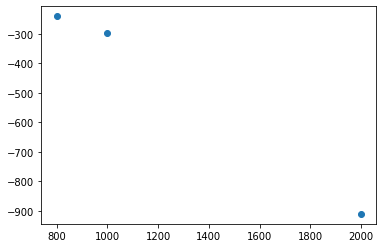

In [584]:
plt.plot([800,1000,2000],[intercept1,interceptSc,interceptCl],'o')

In [943]:
ProdSc = []
ConsSc = []
ConsNight = []
ConsDay = []
for i in range (len(dfOVO2)):
    if BatterySmall1_Big0[i]==1:
        df=dfOVO2[i]
        ProdSc.append(f.Daily_Mean_Power(dfOVO2[i])[1])
        ConsSc.append(f.Daily_Mean_Power(dfOVO2[i])[0])
        ConsNight.append((f.Daily_Profile(df)['Supply Voltage']*f.Daily_Profile(df)['Supply Current'])[0:7].sum() +
                        (f.Daily_Profile(df)['Supply Voltage']*f.Daily_Profile(df)['Supply Current'])[17:24].sum())
        ConsDay.append((f.Daily_Profile(df)['Supply Voltage']*f.Daily_Profile(df)['Supply Current'])[7:17].sum())
        
ConsNightCl = []
ConsDayCl = []
for i in range (len(dfOVO2)):
    if BatterySmall1_Big0[i]==0:
        df=dfOVO2[i]
        ConsNightCl.append((f.Daily_Profile(df)['Supply Voltage']*f.Daily_Profile(df)['Supply Current'])[0:7].sum() +
                        (f.Daily_Profile(df)['Supply Voltage']*f.Daily_Profile(df)['Supply Current'])[17:24].sum())
        ConsDayCl.append((f.Daily_Profile(df)['Supply Voltage']*f.Daily_Profile(df)['Supply Current'])[7:17].sum())

In [936]:
ConsDay=np.array(ConsDay)
ProdSc=np.array(ProdSc)
ConsNight=np.array(ConsNight)
ConsSc=np.array(ConsSc)
#ConsNight
#ConsDay

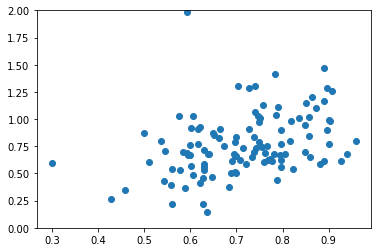

In [937]:
#The night consumption represents the utilization of the battery
ProdSc = np.array(ProdSc)
ConsSc = np.array(ConsSc)
plt.plot(ConsNight/ConsSc,ConsSc/ProdSc,'o')
axes = plt.gca()
axes.set_ylim(0, 2)
slope, intercept, r_value, p_value, std_err = stats.linregress((ConsNight-ConsSc)/ConsSc,(ConsSc-ProdSc)/ProdSc)

Text(0, 0.5, 'Energy (Wh)')

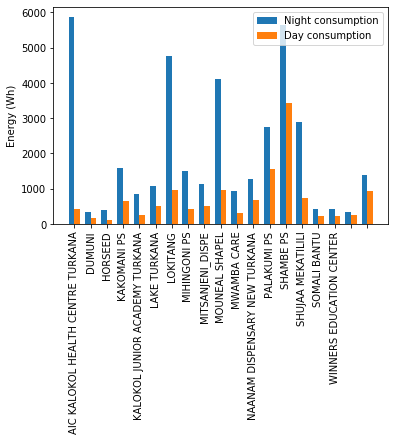

In [944]:
Prod = ConsNightCl
Cons = ConsDayCl
namechart = nameOVO1
index=np.zeros(len(Prod))
for i in range (len(Prod)):
    index[i]=i
bar_width = 0.35
plt.bar(index,Prod,bar_width)
plt.bar(index+bar_width,Cons,bar_width)
plt.xticks(rotation=90)
plt.legend(['Night consumption','Day consumption'])
#Daily mean prod and cons in Wh/day
plt.xticks(index + (1/2)*bar_width, namechart)
plt.ylabel("Energy (Wh)")

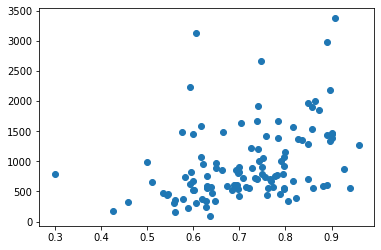

In [929]:
plt.plot(ConsNight/ConsSc, ConsSc,'o')